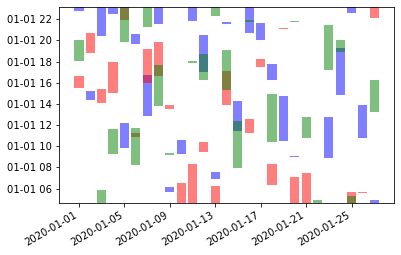

In [5]:
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

def main():
    start, stop = dt.datetime(2020,1,1), dt.datetime(2020, 1, 28)

    fig, ax = plt.subplots()
    for color in ['blue', 'red', 'green']:
        starts, stops = generate_data(start, stop)
        plot_durations(starts, stops, ax, facecolor=color, alpha=0.5)
    plt.show()

def plot_durations(starts, stops, ax=None, **kwargs):
    if ax is None:
        ax = plt.gca()
    # Make the default alignment center, unless specified otherwise
    kwargs['align'] = kwargs.get('align', 'center')

    # Convert things to matplotlib's internal date format...
    starts, stops = mpl.dates.date2num(starts), mpl.dates.date2num(stops)

    # Break things into start days and start times 
    start_times = starts % 1
    start_days = starts - start_times
    durations = stops - starts
    start_times += int(starts[0]) # So that we have a valid date...

    # Plot the bars
    artist = ax.bar(start_days, durations, bottom=start_times, **kwargs)

    # Tell matplotlib to treat the axes as dates...
    ax.xaxis_date()
    ax.yaxis_date()
    ax.figure.autofmt_xdate()
    return artist

def generate_data(start, stop):
    """Generate some random data..."""
    # Make a series of events 1 day apart
    starts = mpl.dates.drange(start, stop, dt.timedelta(days=1))

    # Vary the datetimes so that they occur at random times
    # Remember, 1.0 is equivalent to 1 day in this case...
    starts += np.random.random(starts.size)

    # Make some random stopping times...
    stops = starts + 0.2 * np.random.random(starts.size)

    # Convert back to datetime objects...
    return mpl.dates.num2date(starts), mpl.dates.num2date(stops)

if __name__ == '__main__':
    main()